In [17]:
# parse and visualize the logfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot(log_file, subplot=None):
    if subplot is None:
        subplot = plt
    # load the log file
    with open(log_file, "r") as f:
        lines = f.readlines()

    # parse the individual lines, group by stream (train,val,hella)
    streams = {}
    for line in lines:
        step, stream, val = line.strip().split()
        if stream not in streams:
            streams[stream] = {}
        streams[stream][int(step)] = float(val)

    # convert each stream from {step: val} to (steps[], vals[])
    # so it's easier for plotting
    streams_xy = {}
    for k, v in streams.items():
        # get all (step, val) items, sort them
        xy = sorted(list(v.items()))
        # unpack the list of tuples to tuple of lists
        streams_xy[k] = list(zip(*xy))

    # Panel 1: losses: both train and val
    xs, ys = streams_xy["train"] # training loss
    ys = np.array(ys)
    subplot.plot(xs, ys, label=f'train accuracy')
    xs, ys = streams_xy["val"] # validation loss
    subplot.plot(xs, ys, label=f'val accuracy')
    subplot.set_xlabel("steps")
    subplot.set_ylabel("Accuracy")
    subplot.set_xscale("log")
    subplot.set_xlim(left=10)
    subplot.grid()

    subplot.legend()
    subplot.set_title(f"Accuracy {log_file}")

def plot_num_steps(op):
    xs = []
    ys = []
    for p in np.arange(0.2, 0.85, 0.05):
        p_str = f"{p:.2f}"
        fname = f"log_{op}_{p_str}/log.txt"
        try:
            with open(fname, 'r') as f:
                last_line = f.readlines()[-1]
        except:
            continue
        step, stream, acc = last_line.strip().split()
        step = int(step)
        acc = float(acc)
        if stream != "val" or acc < 0.98:
            continue
        xs.append(p)
        ys.append(step)
    plt.plot(xs, ys)
    plt.yscale("log")
    plt.title(f"Number of steps to reach 98% accuracy")
    plt.xlabel("p")
    plt.ylabel("steps")

In [3]:
op = "*"

In [4]:
for p in np.arange(0.2, 0.85, 0.05):
    p_str = f"{p:.2f}"
    !/Users/wilsoncwu/environments/data/bin/python /Users/wilsoncwu/Desktop/code/notebooks/grokking/train_gpt.py '{op}' {p_str} --quiet

^C
Traceback (most recent call last):
  File "/Users/wilsoncwu/Desktop/code/notebooks/grokking/train_gpt.py", line 292, in <module>
    logits, loss, accuracy = model(x, y)
                             ^^^^^^^^^^^
  File "/Users/wilsoncwu/environments/data/lib/python3.12/site-packages/torch/nn/modules/module.py", line 1511, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/wilsoncwu/environments/data/lib/python3.12/site-packages/torch/nn/modules/module.py", line 1520, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/wilsoncwu/Desktop/code/notebooks/grokking/train_gpt.py", line 123, in forward
    x = self.transformer.ln_f(x)
        ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/wilsoncwu/environments/data/lib/python3.12/site-packages/torch/nn/modules/module.py", line 1511, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^

In [6]:
!/Users/wilsoncwu/environments/data/bin/python /Users/wilsoncwu/Desktop/code/notebooks/grokking/train_gpt.py '{op}' 0.50 --quiet --use_grokfast

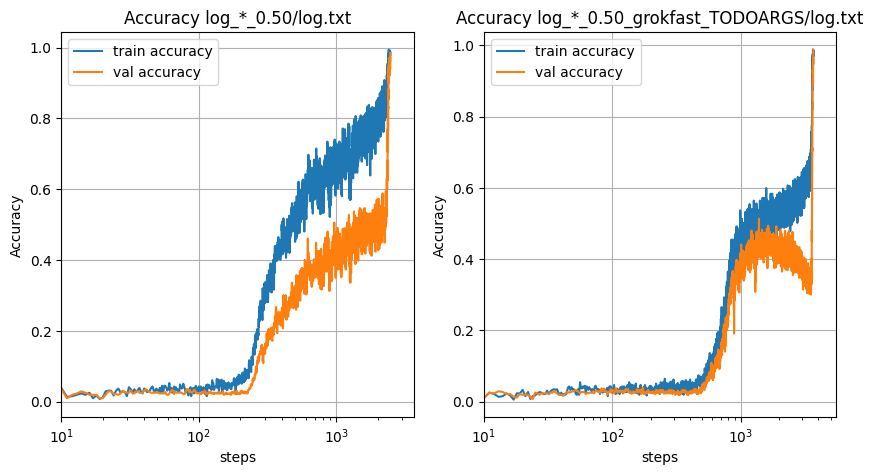

In [19]:
figure, axis = plt.subplots(1,2,figsize=(10,5))
plot(f"log_*_0.50/log.txt",axis[0])
plot(f"log_*_0.50_grokfast_TODOARGS/log.txt",axis[1])

In [18]:
!/Users/wilsoncwu/environments/data/bin/python /Users/wilsoncwu/Desktop/code/notebooks/grokking/train_gpt.py '{op}' 0.25 --quiet --use_grokfast

^C
Traceback (most recent call last):
  File "/Users/wilsoncwu/Desktop/code/notebooks/grokking/train_gpt.py", line 275, in <module>
    logits, loss, accuracy = model(x_val, y_val)
                             ^^^^^^^^^^^^^^^^^^^
  File "/Users/wilsoncwu/environments/data/lib/python3.12/site-packages/torch/nn/modules/module.py", line 1511, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/wilsoncwu/environments/data/lib/python3.12/site-packages/torch/nn/modules/module.py", line 1520, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/wilsoncwu/Desktop/code/notebooks/grokking/train_gpt.py", line 121, in forward
    x = block(x)
        ^^^^^^^^
  File "/Users/wilsoncwu/environments/data/lib/python3.12/site-packages/torch/nn/modules/module.py", line 1511, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^

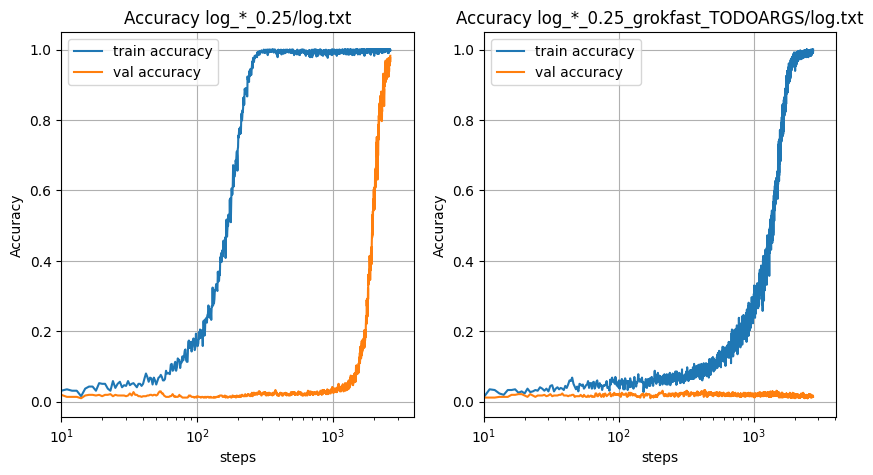

In [20]:
figure, axis = plt.subplots(1,2,figsize=(10,5))
plot(f"log_*_0.25/log.txt",axis[0])
plot(f"log_*_0.25_grokfast_TODOARGS/log.txt",axis[1])

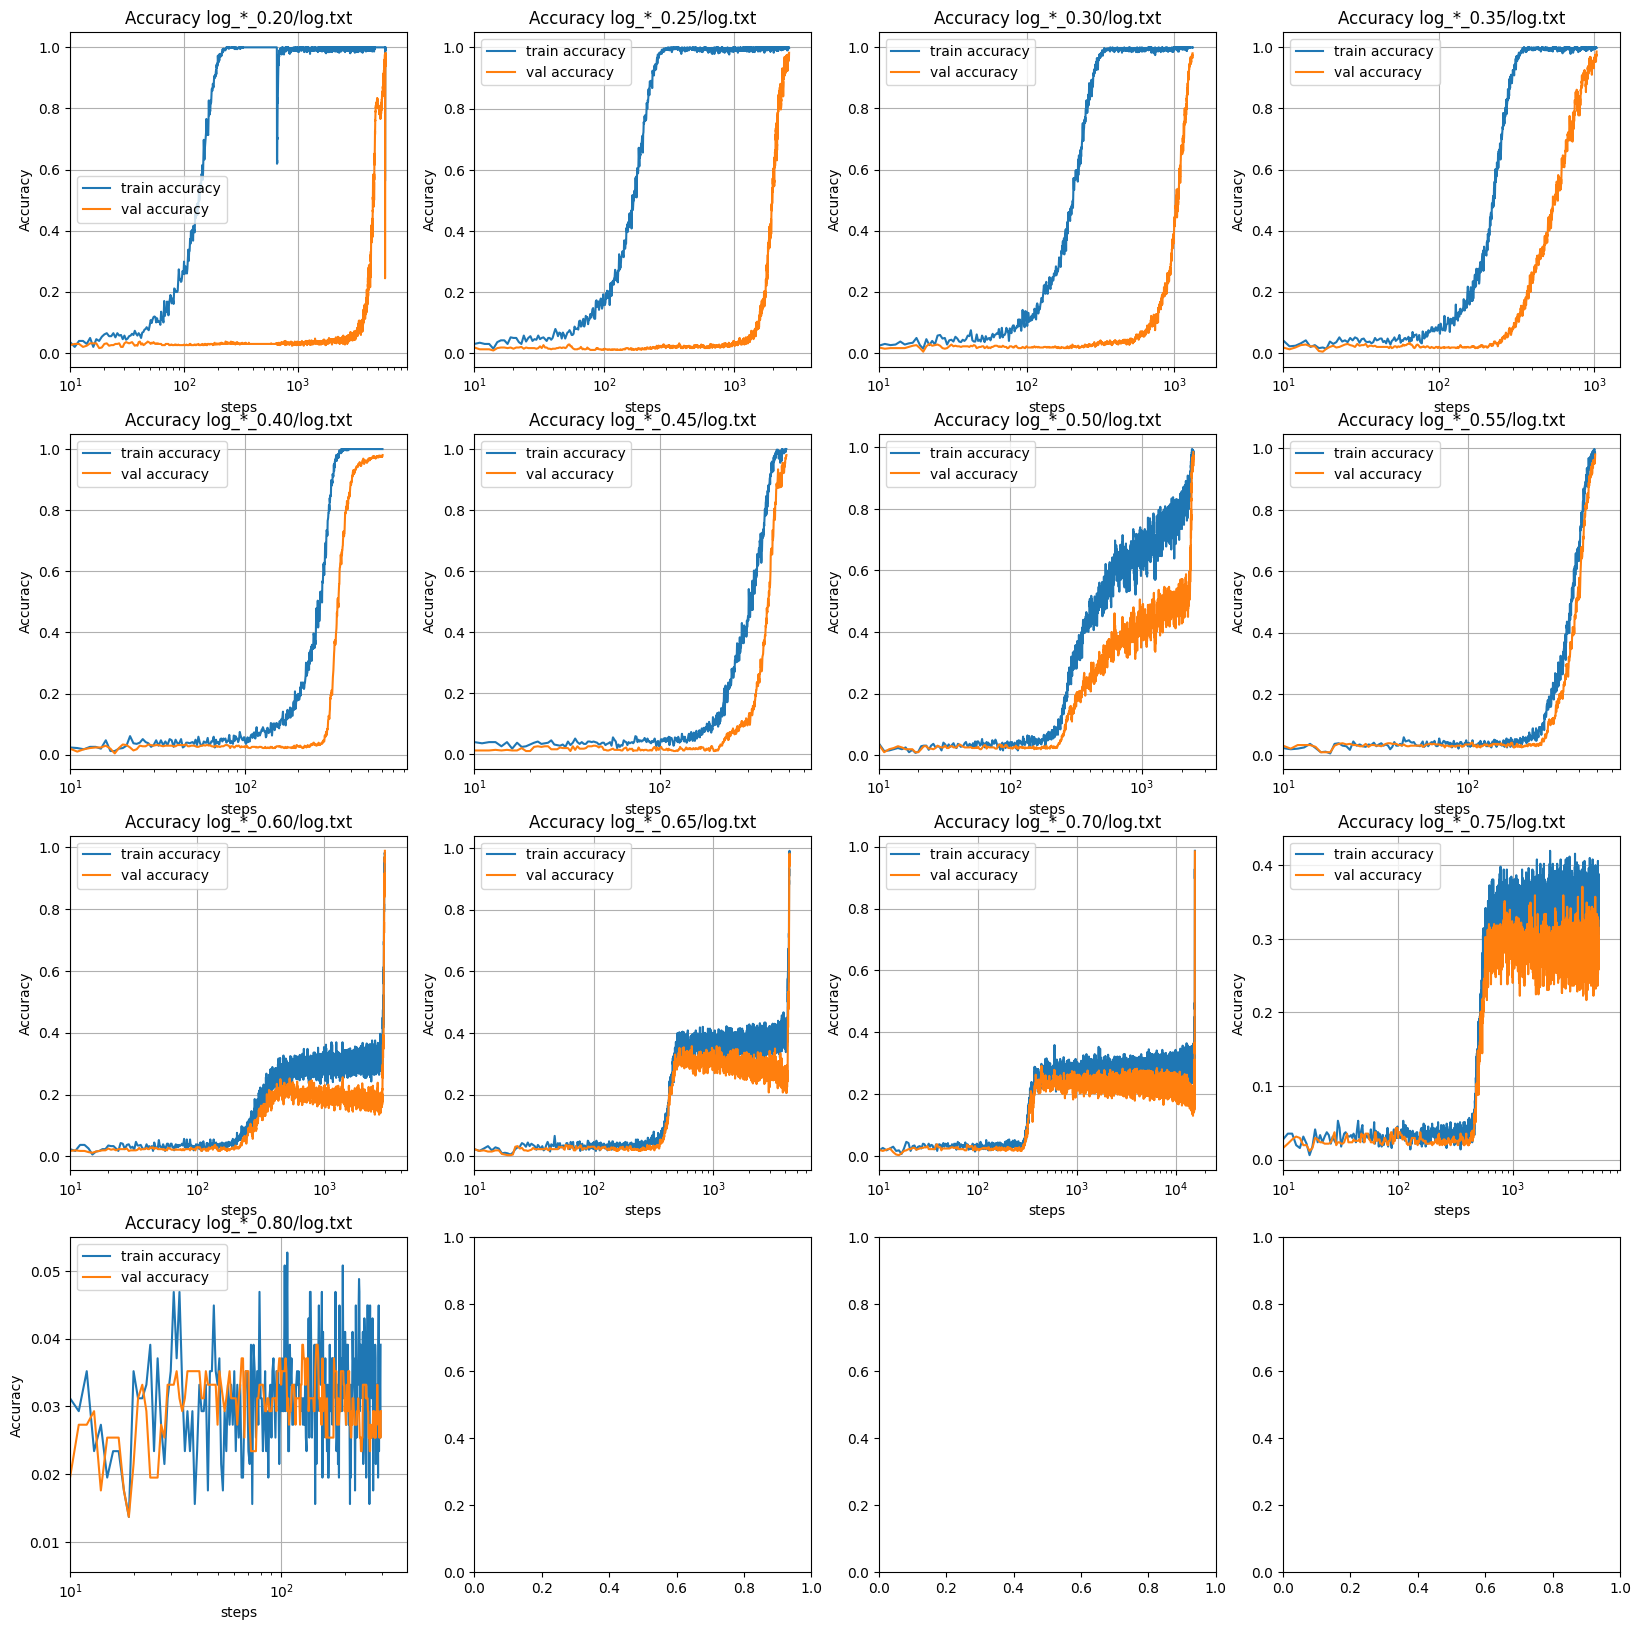

In [9]:
figure, axis = plt.subplots(4,4,figsize=(20,20))
for i, p in enumerate(np.arange(0.2, 0.85, 0.05)):
    p_str = f"{p:.2f}"
    plot(f"log_{op}_{p_str}/log.txt",axis[i//4][i%4])

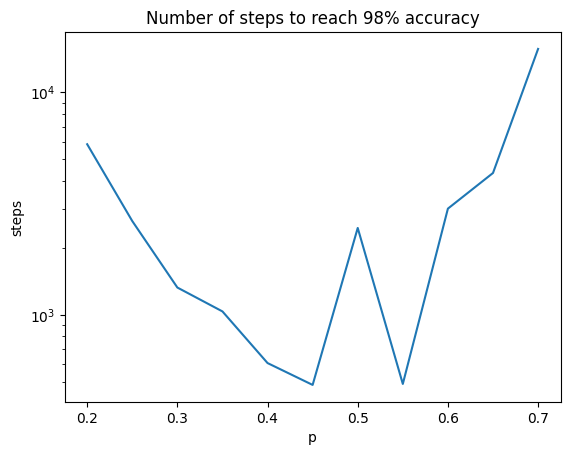

In [21]:
plot_num_steps("*")

FileNotFoundError: [Errno 2] No such file or directory: 'log_+_0.70/log.txt'

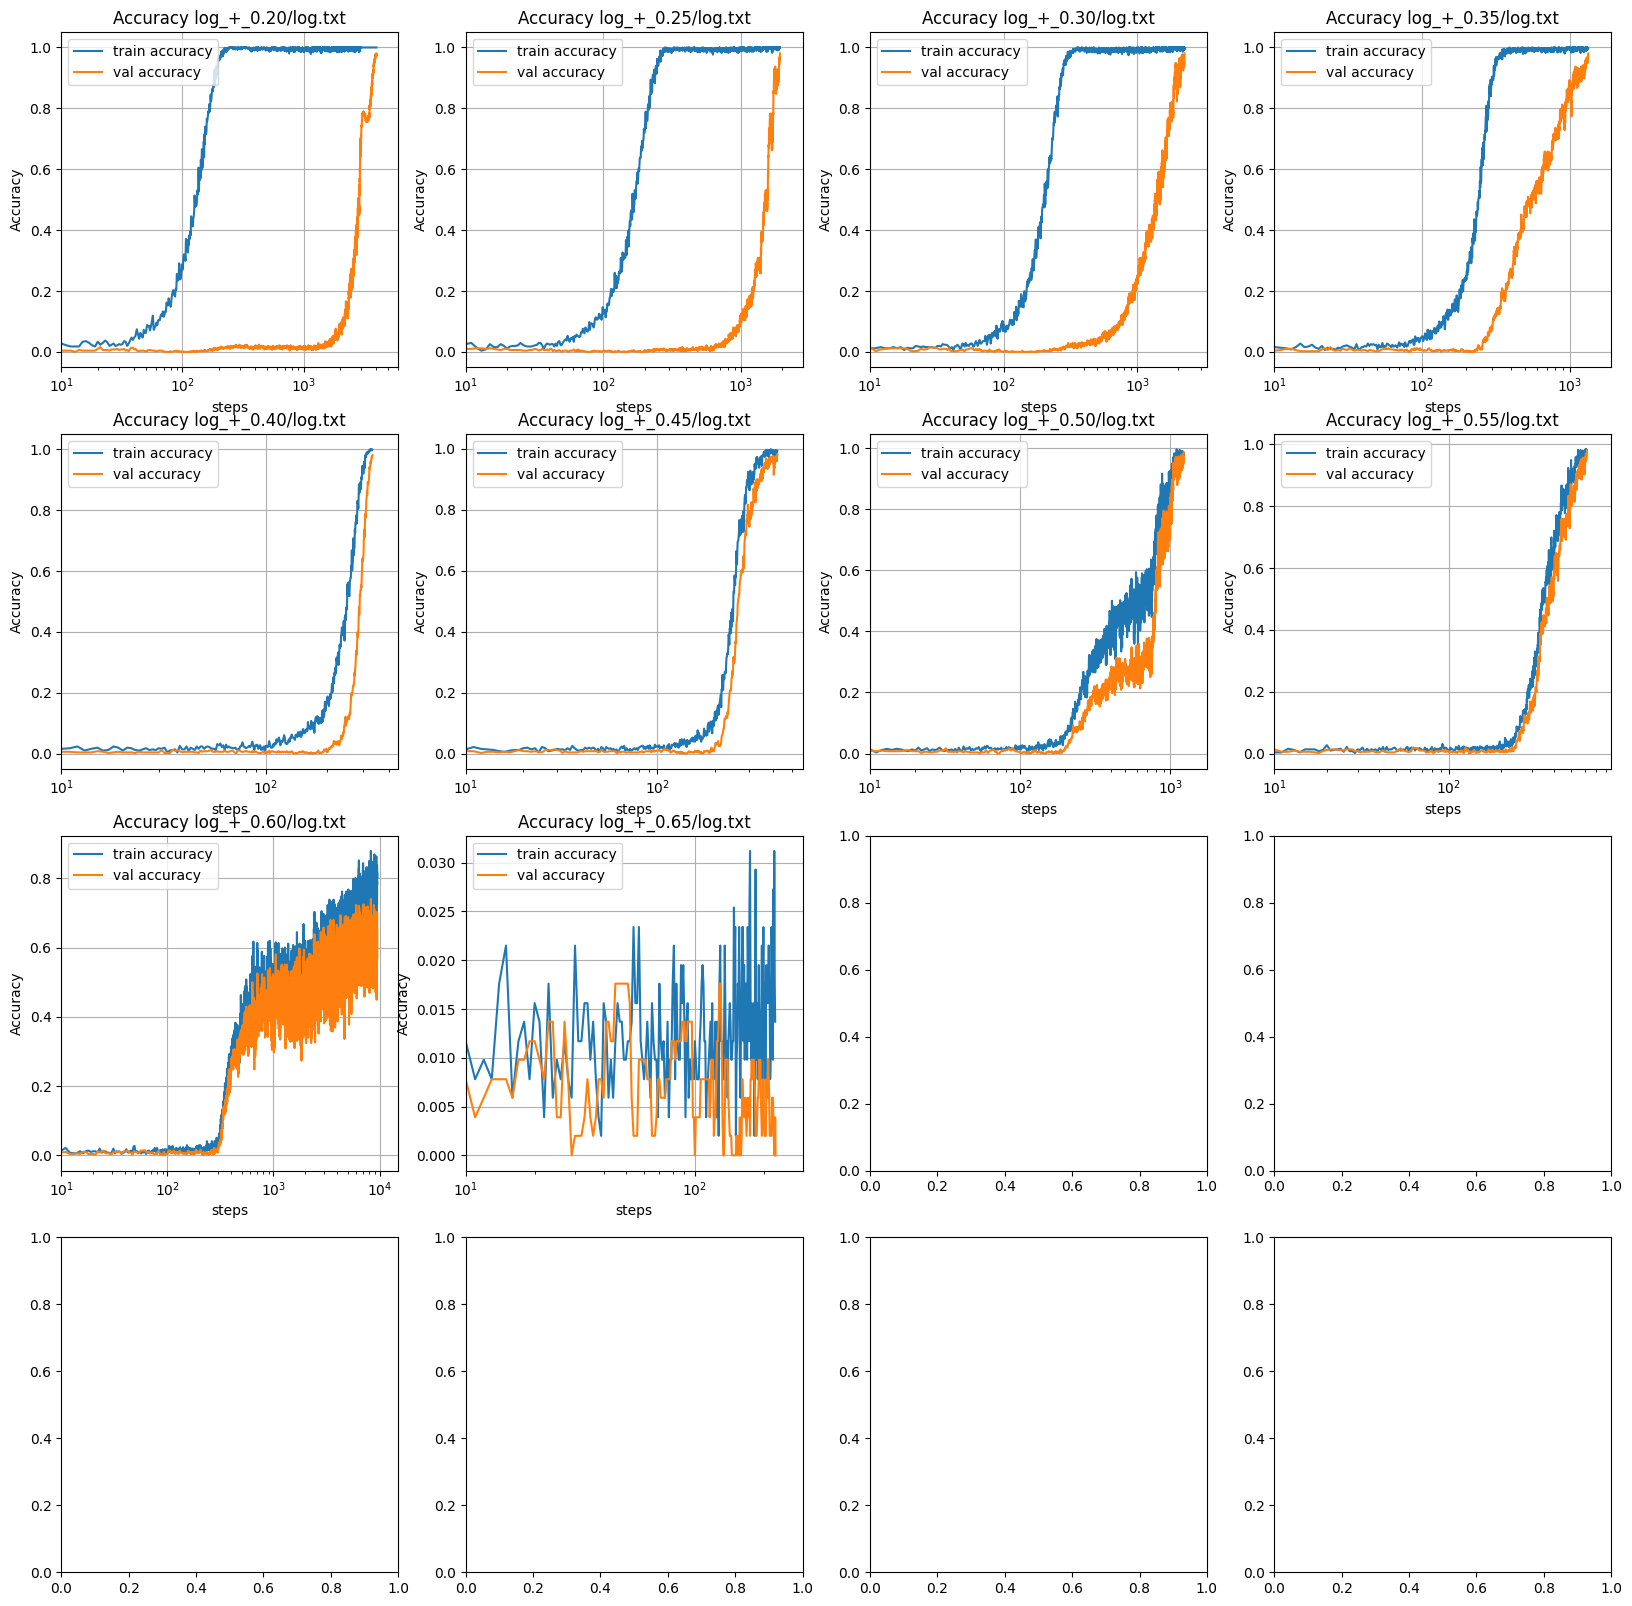

In [4]:
# + sometimes didnt converge?
figure, axis = plt.subplots(4,4,figsize=(20,20))
for i, p in enumerate(np.arange(0.2, 0.85, 0.05)):
    p_str = f"{p:.2f}"
    plot(f"log_{op}_{p_str}/log.txt",axis[i//4][i%4])

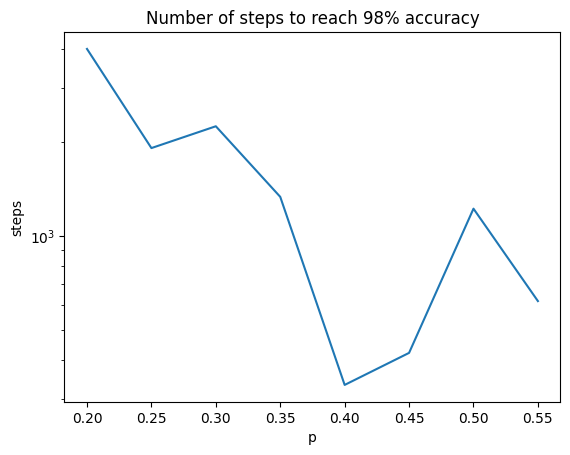

In [22]:
plot_num_steps("+")